TEMP

In [2]:
import pandas as pd
import numpy as np

In [7]:
A = pd.DataFrame({'a': [3]})

In [8]:
A

,a
0,3


In [16]:
A['a'].iloc[0] == A['a'].to_numpy()[0]

True

In [17]:
A['a'].to_numpy()

array([3])

In [11]:
A['a'].mean()

3.0

In [19]:
float([3])

TypeError: float() argument must be a string or a number, not 'list'

In [33]:
A = [[1, 0], [0.5, 0.5], [0, 1], [1.5, 0.75]] 

In [37]:
A = np.array(A)

In [38]:
A

array([[1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [1.5 , 0.75]])

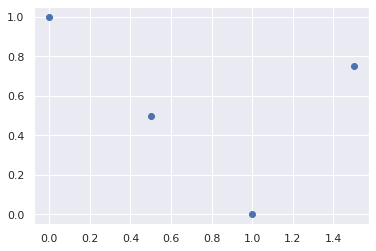

In [39]:
plt.scatter(A[:,0], A[:,1])

In [41]:
hv = pg.hypervolume(A)
ref_point = [2,2]
hv.compute(ref_point)

3.25

In [42]:
pareto_index = pg.non_dominated_front_2d(A)

In [45]:
pareto_index

array([2, 1, 0], dtype=uint64)

In [50]:
A2 = A[pareto_index]
A2

array([[0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ]])

In [49]:
hv = pg.hypervolume(A2)
ref_point = [2,2]
hv.compute(ref_point)

3.25

# Checking Results

In [2]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
configs = pd.read_csv('./Harmonic_Mean_Results/dataset_1/test/new_results_single_obj_dataset_1_2_3_retake')

In [4]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,879.161938,13.442956,0.001681,5.422470,7.948337,5.023463,0.916018,4.690724,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
1,42.074076,31.107173,0.492120,19.037790,41.146119,33.112050,0.355375,21.738432,"{""num_rec"": 1, ""max_time"": 29, ""neuron_0"": 38,..."
2,68.201320,56.273127,-288.507299,9.504915,57.959525,47.907047,-228.412907,9.529593,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 75,..."
3,11.682171,6.476700,0.825046,3.973408,9.586537,4.831271,0.814487,3.263510,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
4,44.851458,33.098419,-72.243914,6.609819,36.071873,25.327510,-59.447482,6.328387,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."


In [5]:
configs.shape

(281, 9)

In [6]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [7]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

In [8]:
configs_bi = pd.read_csv('./GRU/Final_experiments/dataset_1/results_no_cv_HO_14_12_MO').iloc[:300]

In [9]:
configs_bi.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,1.181496e+02,9.547102e+01,-8.401320,0.539599,1.145878e+02,1.008391e+02,-14.996822,0.552505,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,3.871338e+01,2.933810e+01,0.356078,15.063834,3.744115e+01,3.006062e+01,0.127134,15.859310,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,4.784384e+01,3.659232e+01,0.118531,5.907845,4.567716e+01,3.656544e+01,-0.127551,5.832887,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
3,4.544020e+01,3.409842e+01,0.070034,8.355793,4.167088e+01,3.360285e+01,-0.126457,8.494248,"{""num_rec"": 1, ""max_time"": 27, ""neuron_0"": 95,..."
4,8.396453e+10,1.083317e+09,-0.000166,0.407556,1.066565e+09,1.068397e+08,-0.010136,0.411235,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [10]:
configs_bi.shape

(300, 9)

In [11]:
scaler_bi = MinMaxScaler()
norm_cfgs_bi = scaler_bi.fit_transform(configs_bi[['rmse_test', 'uncertainty_test']])

In [12]:
hyper_volume_bi =[]
for i in range(norm_cfgs_bi.shape[0]):
    hv_bi = pg.hypervolume(norm_cfgs_bi[:i+1])
    hyper_volume_bi.append(hv_bi.compute(ref_point=[1.1,1.1]))

hyper_volume_bi = np.array(hyper_volume_bi)

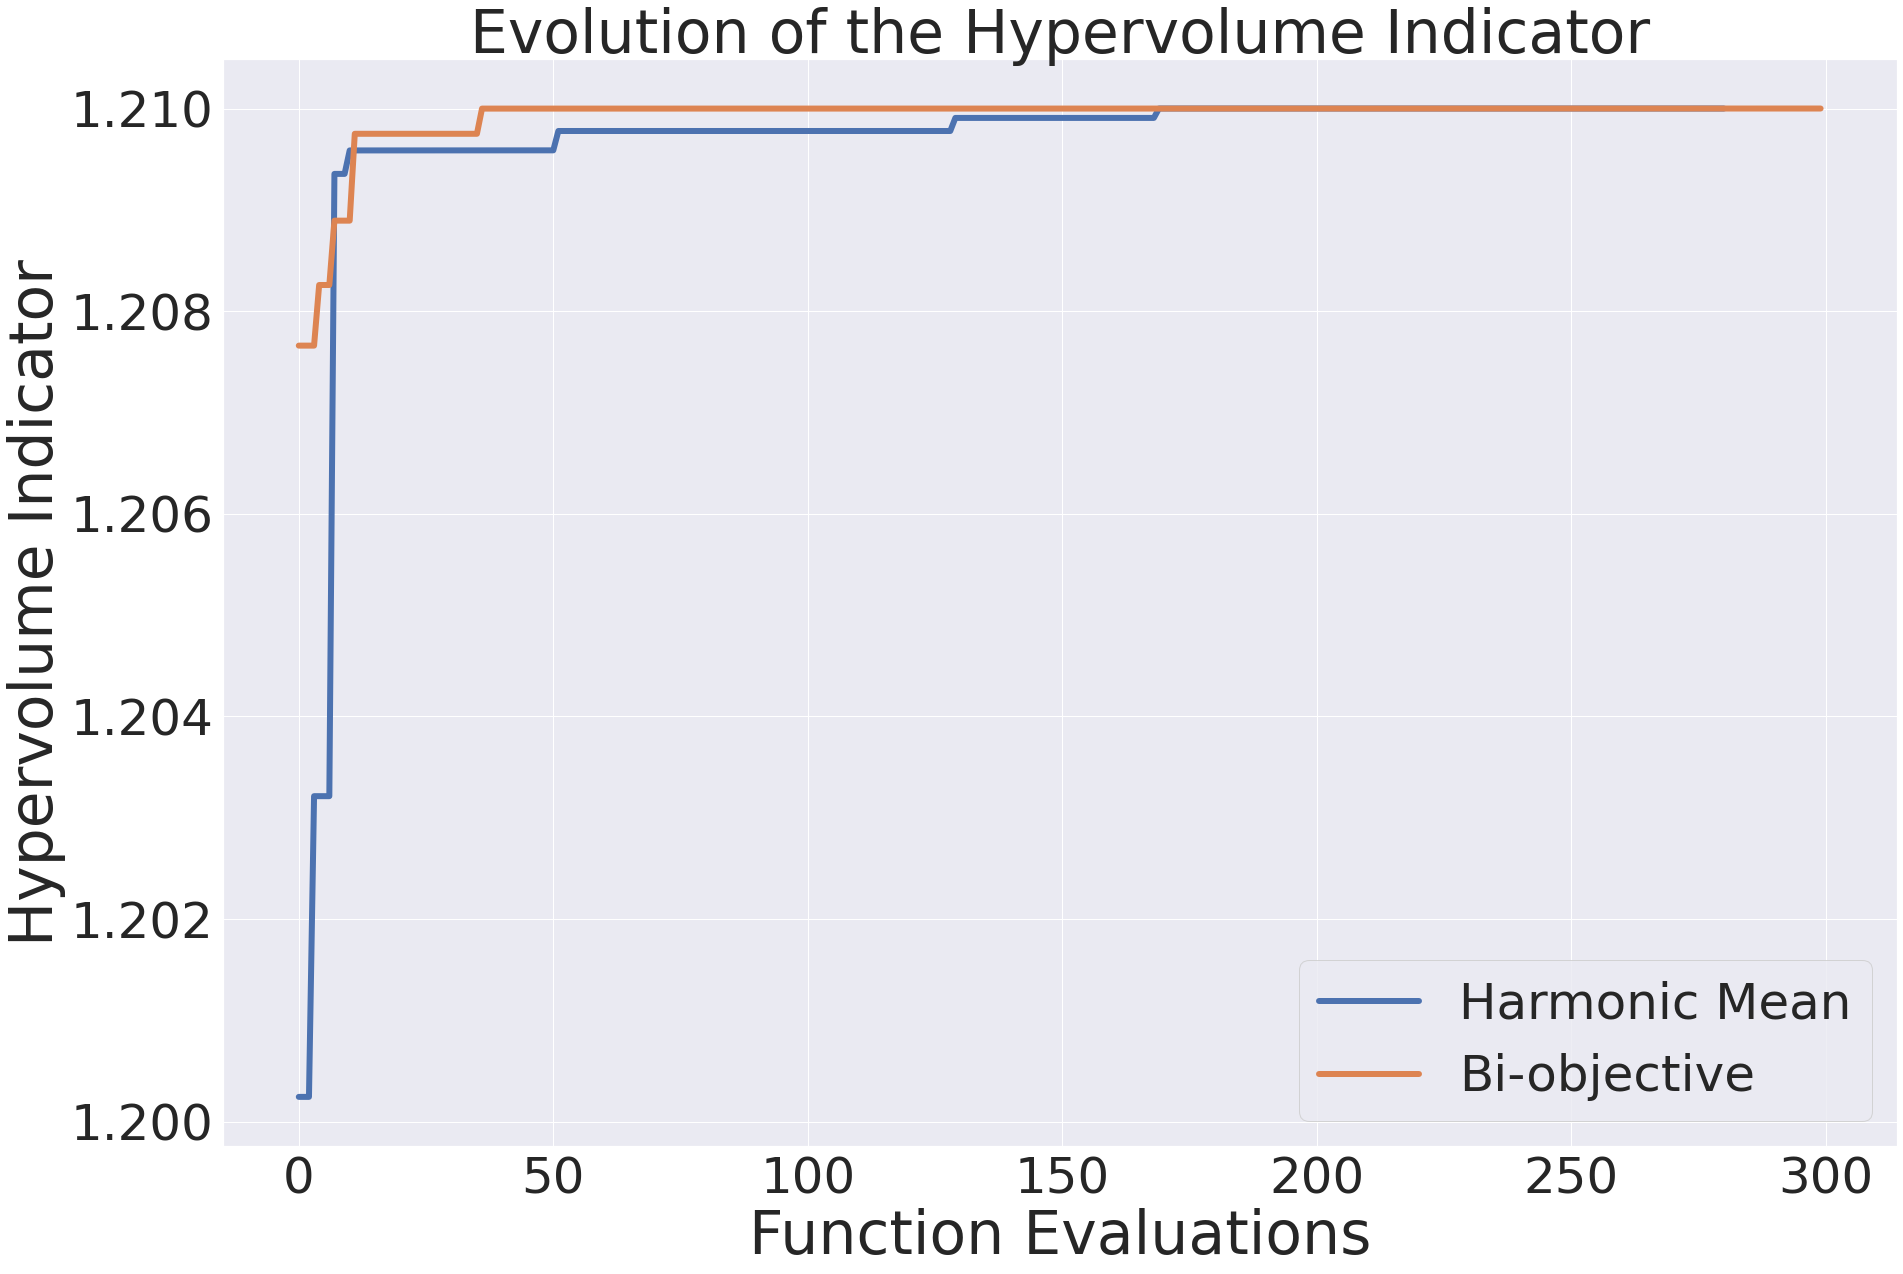

In [13]:
plt.figure(figsize=(30,20))
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume, label='Harmonic Mean', linewidth=6) 
plt.plot(np.arange(hyper_volume_bi.shape[0]), hyper_volume_bi, label='Bi-objective', linewidth=6)
plt.xlabel('Function Evaluations', fontsize=60)
plt.ylabel('Hypervolume Indicator', fontsize=60)
plt.title('Evolution of the Hypervolume Indicator', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size': 50}) 

plt.savefig('./paper_figures/cmapss_1_HM_vs_BI_HVI_RETAKE.pdf', format='pdf')
 



In [14]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']]) 

In [15]:
pareto_configs = configs.iloc[pareto_index] 

In [16]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
154,4.254174,1.981173,0.982561,7.334978,4.211031,1.648317,0.970479,6.210769,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
29,8.556123,4.251152,0.924224,2.241270,6.091472,2.825808,0.935180,2.006770,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
272,9.928486,5.045118,0.933662,1.425256,12.848347,6.020891,0.830865,0.879652,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
266,33.385258,28.991886,-0.220581,0.241554,32.293761,29.244426,-0.579269,0.222816,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
180,36.902199,27.180999,0.541241,0.055319,32.544138,25.766195,0.488838,0.035376,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
169,38.311240,34.769412,-11.243588,0.002713,40.199357,37.356577,-20.197057,0.000005,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

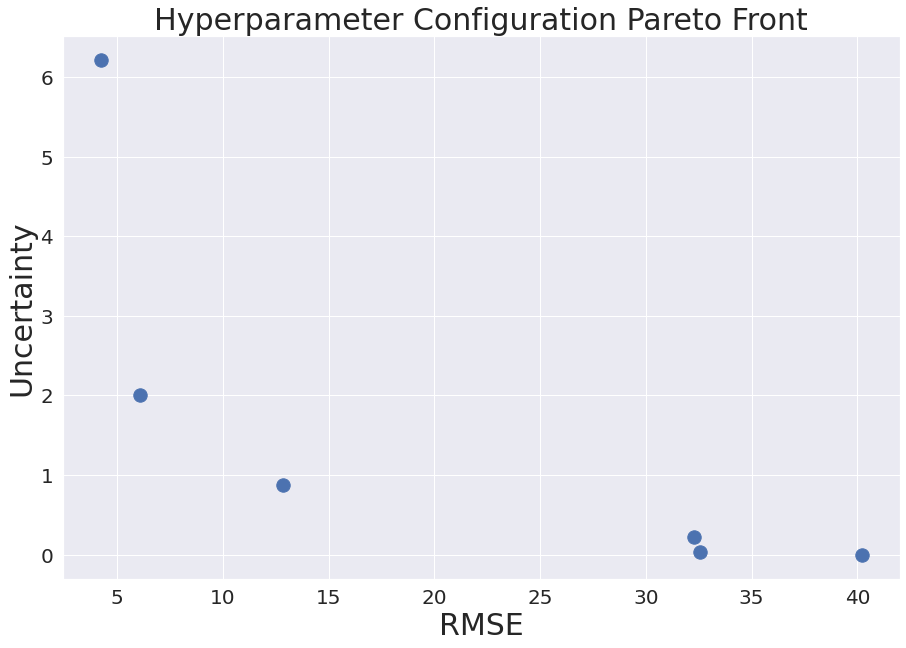

In [17]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [18]:
pareto_configs.loc[169].net_cfg

'{"num_rec": 1, "max_time": 48, "neuron_0": 35, "neuron_1": 10, "neuron_2": 21, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", "rec_dropout_norm_0": 1e-05, "rec_dropout_norm_1": 0.0286427995300293, "rec_dropout_norm_2": 1e-05, "recurrent_dropout_0": 1e-05, "recurrent_dropout_1": 0.2166030523681641, "recurrent_dropout_2": 1e-05, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 58, "rul": 112, "rul_style": "nonlinear", "lr": "2e-5", "batch": "32", "num_den": 2, "neuron_den_0": 79, "neuron_den_1": 56, "neuron_den_2": 74, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 1e-05, "dropout_1": 1e-05, "dropout_2": 1e-05}'

# Training full model on the best HP

In [25]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import json

In [114]:
net_cfg = {"num_rec": 1, "max_time": 41, "neuron_0": 52, "neuron_1": 27, "neuron_2": 29, "activation_rec_0": "tanh", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.260163359375, "rec_dropout_norm_1": 0.1704197886657715, "rec_dropout_norm_2": 0.5103088643848896, "recurrent_dropout_0": 0.34778238580640874, "recurrent_dropout_1": 0.5119542298076659, 
"recurrent_dropout_2": 0.3339851733695705, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 73, "rul": 122, "rul_style": "nonlinear", "lr": "1e-3", "batch": "32", 
"num_den": 2, "neuron_den_0": 58, "neuron_den_1": 81, "neuron_den_2": 57, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.006354533996582031, 
"dropout_1": 0.8976313809482753, "dropout_2": 0.5626136120605468}

net_cfg = {"num_rec": 1, "max_time": 20, "neuron_0": 53, "neuron_1": 63, "neuron_2": 72, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.08550905, "rec_dropout_norm_1": 0.8235008500000001, "rec_dropout_norm_2": 0.15750825000000002, "recurrent_dropout_0": 0.17550805000000003, "recurrent_dropout_1": 0.6345029500000001, 
"recurrent_dropout_2": 0.09450895000000001, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 72, "rul": 121, "rul_style": "nonlinear", "lr": "1e-3", "batch": "128", 
"num_den": 1, "neuron_den_0": 35, "neuron_den_1": 94, "neuron_den_2": 17, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.19350785, 
"dropout_1": 0.8595004500000001, "dropout_2": 0.10350885}

net_cfg = {"num_rec": 3, "max_time": 20, "neuron_0": 26, "neuron_1": 10, "neuron_2": 93, "activation_rec_0": "tanh", "activation_rec_1": "sigmoid", "activation_rec_2": "tanh", "rec_dropout_norm_0": 1e-05, 
"rec_dropout_norm_1": 0.19534474365234378, "rec_dropout_norm_2": 1e-05, "recurrent_dropout_0": 0.11250875, "recurrent_dropout_1": 0.3548644555664063, "recurrent_dropout_2": 1e-05, 
"final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 60, "rul": 128, "rul_style": "nonlinear", "lr": "1e-2", "batch": "32", "num_den": 1, "neuron_den_0": 91, 
"neuron_den_1": 88, "neuron_den_2": 79, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.45000500000000004, "dropout_1": 1e-05, 
"dropout_2": 1e-05}

net_cfg = {"num_rec": 2, "max_time": 29, "neuron_0": 40, "neuron_1": 39, "neuron_2": 37, "activation_rec_0": "tanh", "activation_rec_1": "tanh", "activation_rec_2": "tanh", 
"rec_dropout_norm_0": 0.0024331473835008184, "rec_dropout_norm_1": 0.4057974831491709, "rec_dropout_norm_2": 0.2893042709350586, "recurrent_dropout_0": 0.18100129806493234, 
"recurrent_dropout_1": 0.3172282643754781, "recurrent_dropout_2": 0.1315644531464577, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 58, 
"rul": 122, "rul_style": "nonlinear", "lr": "1e-5", "batch": "64", "num_den": 2, "neuron_den_0": 28, "neuron_den_1": 49, "neuron_den_2": 48, "activation_den_0": "sigmoid", 
"activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.03780496969049449, "dropout_1": 0.11423907745361328, "dropout_2": 0.2354716299291328}

net_cfg = {"num_rec": 2, "max_time": 47, "neuron_0": 48, "neuron_1": 10, "neuron_2": 19, "activation_rec_0": "tanh", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.26678346977928397, "rec_dropout_norm_1": 0.31896830901269185, "rec_dropout_norm_2": 0.30260630511053377, "recurrent_dropout_0": 0.5758534649896873, 
"recurrent_dropout_1": 0.35485323774062405, "recurrent_dropout_2": 0.5511541758773184, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 66, "rul": 118, 
"rul_style": "nonlinear", "lr": "1e-5", "batch": "64", "num_den": 1, "neuron_den_0": 50, "neuron_den_1": 28, "neuron_den_2": 96, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", 
"activation_den_2": "tanh", "dropout_0": 0.22282277710259968, "dropout_1": 0.012892175368373246, "dropout_2": 0.04597623447055092}

net_cfg = {"num_rec": 1, "max_time": 48, "neuron_0": 35, "neuron_1": 10, "neuron_2": 21, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 1e-05, "rec_dropout_norm_1": 0.0286427995300293, "rec_dropout_norm_2": 1e-05, "recurrent_dropout_0": 1e-05, "recurrent_dropout_1": 0.2166030523681641, 
"recurrent_dropout_2": 1e-05, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 58, "rul": 112, "rul_style": "nonlinear", "lr": "2e-5", "batch": "32", 
"num_den": 2, "neuron_den_0": 79, "neuron_den_1": 56, "neuron_den_2": 74, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 1e-05, 
"dropout_1": 1e-05, "dropout_2": 1e-05}


In [115]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [116]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [117]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [118]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [119]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


100%|██████████| 100/100 [00:00<00:00, 15955.81it/s]


In [120]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (20631, 48, 17) train_y (20631, 1) test_x (100, 48, 17) test_y (100, 1)


In [121]:
model = tf.keras.models.load_model('Harmonic_Mean_Results/dataset_1/test/169/saved_models_2_3/cp-0100.ckpt', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [122]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 48, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 35)                5670      
_________________________________________________________________
dense (Dense)                (None, 79)                2844      
_________________________________________________________________
dropout (Dropout)            (None, 79)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 160       
_________________________________________________________________
activation (Activation)      (None, 2)              

In [123]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [124]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [125]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [126]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [40]:
results154 = results

In [57]:
results29 = results

In [76]:
results272 = results

In [93]:
results266 = results

In [110]:
results180 = results

In [127]:
results169 = results

In [130]:
Results=pd.concat([results154, results29, results272, results266, results180, results169])
Results.to_csv('./Harmonic_Mean_Results/dataset_1/test/Results_retake', index=False)

In [129]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,3.708381,1.811908,0.986157,6.658229,33.214873,27.880193,0.022839,7.926165,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
0,8.275389,3.842460,0.930123,4.152230,35.189743,28.078110,-0.118644,4.635087,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
0,12.936794,11.349018,0.901211,1.672812,37.505346,31.499391,0.255562,2.590184,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
0,42.129176,37.958344,-1.854213,0.279227,32.198861,25.184896,-0.629157,0.263888,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
0,34.354936,24.437656,0.536372,0.063458,25.972998,19.401963,0.596993,0.064536,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
0,21.563993,19.909705,0.009812,0.003338,27.343713,22.607368,-0.348258,0.000038,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


In [34]:
# Results = pd.read_csv('./Final_experiments/dataset_1/Results')

In [109]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
74,10.132338,4.493613,8.859653e-01,21.648808,7.147626,3.005642,8.955063e-01,22.436848,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 99,..."
9,11.638779,6.135546,8.747255e-01,13.744919,9.675685,5.200673,8.619642e-01,14.114239,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 37,..."
7,14.750334,7.978250,4.696588e-01,5.606514,9.685168,5.307231,6.898526e-01,5.519232,"{""num_rec"": 1, ""max_time"": 49, ""neuron_0"": 71,..."
117,33.098315,27.371759,-5.868046e+01,3.613033,28.559950,23.851663,-9.553102e+01,3.085927,"{""num_rec"": 3, ""max_time"": 46, ""neuron_0"": 78,..."
136,35.513706,29.735137,-1.156902e+11,0.000050,30.604070,26.287727,-5.153182e+29,0.000013,"{""num_rec"": 3, ""max_time"": 37, ""neuron_0"": 92,..."


In [111]:
pareto_configs.reset_index(drop=True, inplace=True) 

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

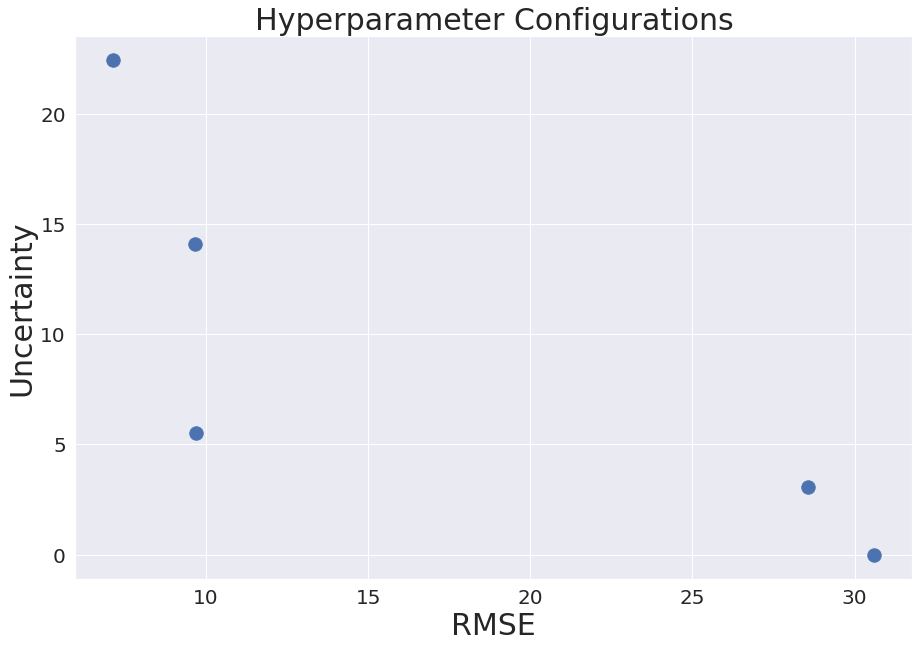

In [113]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [114]:
Results['rank'] = pareto_configs.index 

In [115]:
Results 

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,4.890490,2.109661,9.743462e-01,38.138649,31.098612,25.421649,9.219674e-02,40.720497,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 99,...",0
0,11.463305,6.237360,8.767144e-01,14.471132,25.027276,20.021155,4.643335e-01,15.835980,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 37,...",1
0,31.241483,18.511853,-3.189539e+01,5.116333,51.441251,40.101697,-1.149472e+02,4.961284,"{""num_rec"": 1, ""max_time"": 49, ""neuron_0"": 71,...",2
0,24.613627,17.540363,-9.885075e-01,5.650276,33.722696,28.098555,-2.379999e+00,6.233999,"{""num_rec"": 3, ""max_time"": 46, ""neuron_0"": 78,...",3
0,35.883885,31.690566,-2.148148e+12,0.000013,43.580064,35.932966,-2.351123e+30,0.000010,"{""num_rec"": 3, ""max_time"": 37, ""neuron_0"": 92,...",4


In [41]:
results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,4.812325,2.510569,0.972241,22.818911,24.431929,21.076623,0.356192,25.995838,"{""num_rec"": 2, ""max_time"": 42, ""neuron_0"": 99,..."


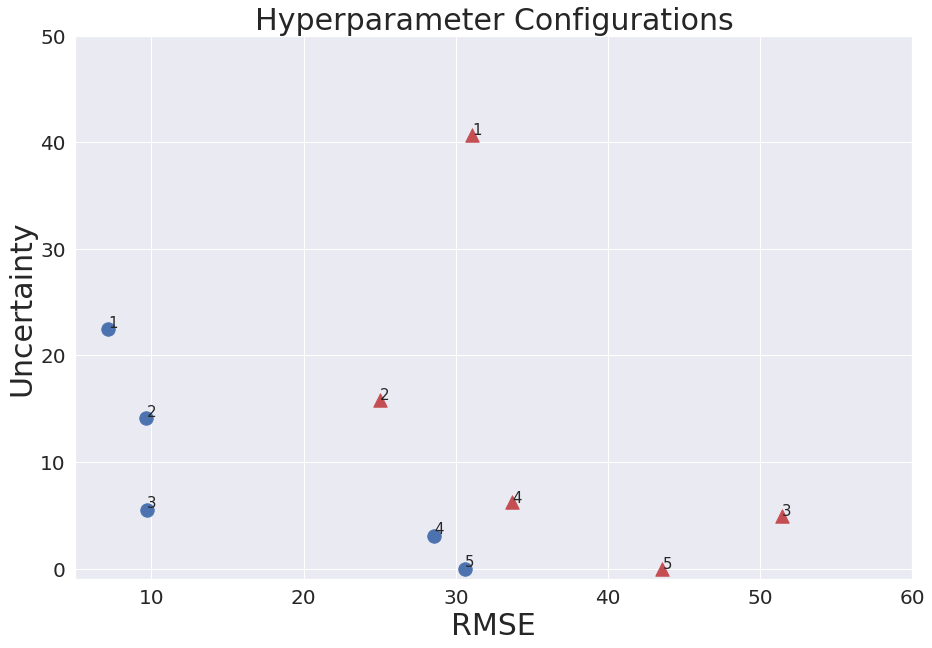

In [119]:
x = Results['rmse_test'].values
y = Results['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5,60)
plt.ylim(-1,50)

for i, txt in enumerate(Results['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

plt.savefig('./paper_figures/cmapss_1_obj_space_harmonic_mean.pdf', format='pdf')
 

Retake

In [19]:
Results_retake = pd.read_csv('./Harmonic_Mean_Results/dataset_1/test/Results_retake')

In [20]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
154,4.254174,1.981173,0.982561,7.334978,4.211031,1.648317,0.970479,6.210769,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
29,8.556123,4.251152,0.924224,2.241270,6.091472,2.825808,0.935180,2.006770,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
272,9.928486,5.045118,0.933662,1.425256,12.848347,6.020891,0.830865,0.879652,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
266,33.385258,28.991886,-0.220581,0.241554,32.293761,29.244426,-0.579269,0.222816,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
180,36.902199,27.180999,0.541241,0.055319,32.544138,25.766195,0.488838,0.035376,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
169,38.311240,34.769412,-11.243588,0.002713,40.199357,37.356577,-20.197057,0.000005,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


In [21]:
pareto_configs.reset_index(drop=True, inplace=True) 

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

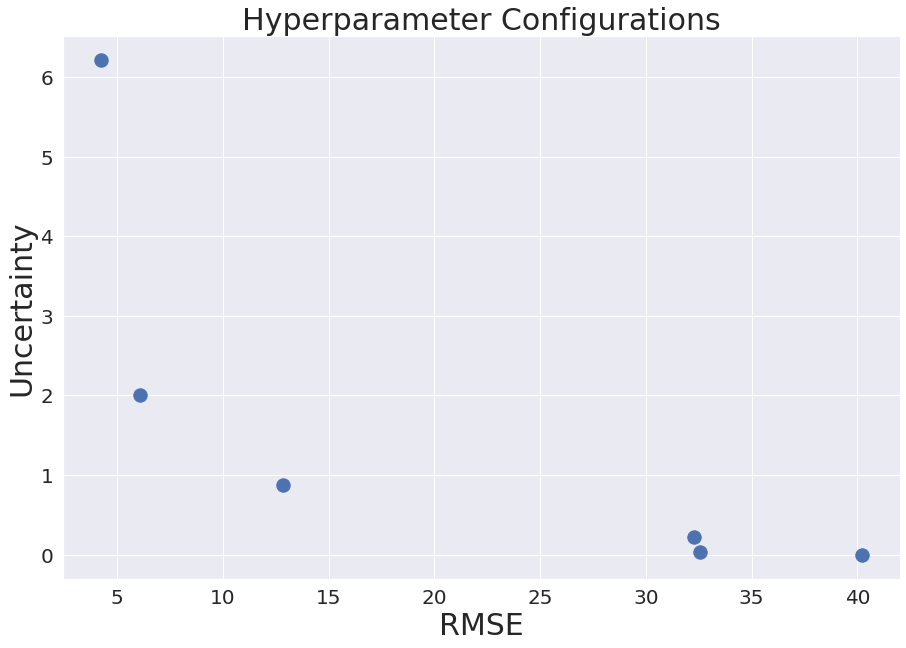

In [22]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [23]:
Results_retake['rank'] = pareto_configs.index 

In [24]:
Results_retake

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,3.708381,1.811908,0.986157,6.658229,33.214873,27.880193,0.022839,7.926165,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,...",0
1,8.275389,3.842460,0.930123,4.152230,35.189743,28.078110,-0.118644,4.635087,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,...",1
2,12.936794,11.349018,0.901211,1.672812,37.505346,31.499391,0.255562,2.590184,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,...",2
3,42.129176,37.958344,-1.854213,0.279227,32.198861,25.184896,-0.629157,0.263888,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,...",3
4,34.354936,24.437656,0.536372,0.063458,25.972998,19.401963,0.596993,0.064536,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,...",4
5,21.563993,19.909705,0.009812,0.003338,27.343713,22.607368,-0.348258,0.000038,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,...",5


In [25]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,4.254174,1.981173,0.982561,7.334978,4.211031,1.648317,0.970479,6.210769,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
1,8.556123,4.251152,0.924224,2.241270,6.091472,2.825808,0.935180,2.006770,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
2,9.928486,5.045118,0.933662,1.425256,12.848347,6.020891,0.830865,0.879652,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
3,33.385258,28.991886,-0.220581,0.241554,32.293761,29.244426,-0.579269,0.222816,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
4,36.902199,27.180999,0.541241,0.055319,32.544138,25.766195,0.488838,0.035376,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
5,38.311240,34.769412,-11.243588,0.002713,40.199357,37.356577,-20.197057,0.000005,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


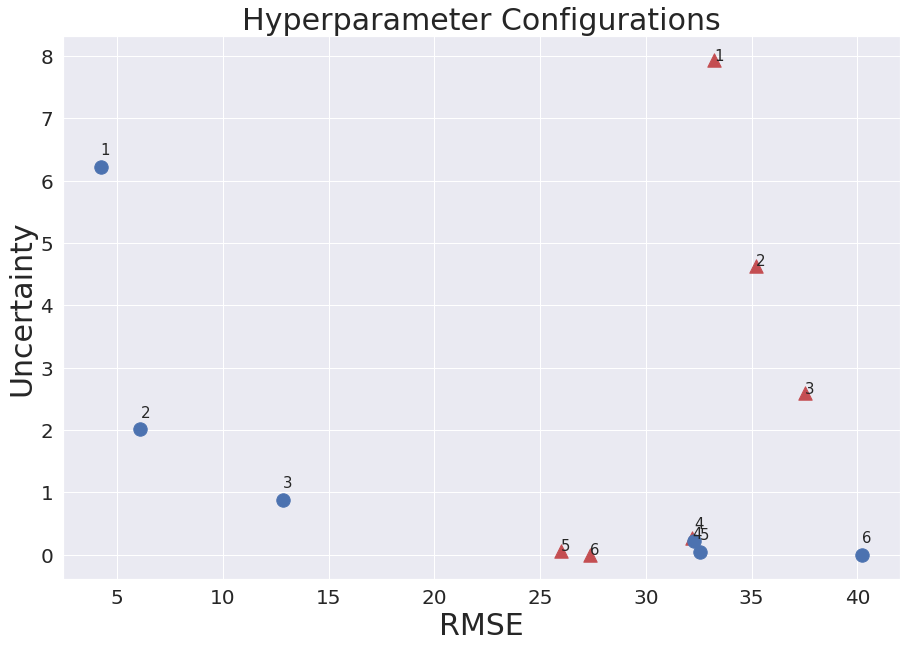

In [27]:
x = Results_retake['rmse_test'].values
y = Results_retake['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0,60)
# plt.ylim(-1,50)

for i, txt in enumerate(Results_retake['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

plt.savefig('./paper_figures/cmapss_1_obj_space_harmonic_mean_RETAKE.pdf', format='pdf')
